In [1]:
# Import necessary libraries for data manipulation and analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot display settings for better visualization
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300

# Set the theme and color palette for seaborn plots
sns.set_theme(style='darkgrid', palette='rainbow')

# Import necessary libraries for data preprocessing and modeling
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import classification_report

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Enable inline display of matplotlib plots
%matplotlib inline

In [5]:
# Import the pandas library and read the Zoo.csv file into a DataFrame
df = pd.read_csv("Zoo.csv")  # Load the data from the CSV file
df.head()  # Display the first few rows of the DataFrame

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [7]:
# Get unique animal names for type 7
df[df.type == 7]["animal name"].unique()

array(['clam', 'crab', 'crayfish', 'lobster', 'octopus', 'scorpion',
       'seawasp', 'slug', 'starfish', 'worm'], dtype=object)

In [9]:
# Define a dictionary containing data about animal classes
dict = {
    "Class_Number": [1,2,3,4,5,6,7],
    "Number_Of_Animal_Species_In_Class":[41,20,5,13,3,8,10],
    "Class_Type": ["Mammal","Bird","Reptile","Fish","Amphibian","Bug","Invertebrate"],
    "Animal_Names": [['aardvark', 'antelope', 'bear', 'boar', 'buffalo', 'calf', 'cavy',
       'cheetah', 'deer', 'dolphin', 'elephant', 'fruitbat', 'giraffe',
       'girl', 'goat', 'gorilla', 'hamster', 'hare', 'leopard', 'lion',
       'lynx', 'mink', 'mole', 'mongoose', 'opossum', 'oryx', 'platypus',
       'polecat', 'pony', 'porpoise', 'puma', 'pussycat', 'raccoon',
       'reindeer', 'seal', 'sealion', 'squirrel', 'vampire', 'vole',
       'wallaby', 'wolf'],['chicken', 'crow', 'dove', 'duck', 'flamingo', 'gull', 'hawk',
       'kiwi', 'lark', 'ostrich', 'parakeet', 'penguin', 'pheasant',
       'rhea', 'skimmer', 'skua', 'sparrow', 'swan', 'vulture', 'wren'],['pitviper', 'seasnake', 'slowworm', 'tortoise', 'tuatara'],
       ['bass', 'carp', 'catfish', 'chub', 'dogfish', 'haddock', 'herring',
       'pike', 'piranha', 'seahorse', 'sole', 'stingray', 'tuna'],['frog', 'newt', 'toad'],['flea', 'gnat', 'honeybee', 'housefly', 'ladybird', 'moth',
       'termite', 'wasp'],['clam', 'crab', 'crayfish', 'lobster', 'octopus', 'scorpion',
       'seawasp', 'slug', 'starfish', 'worm']]
}
class_data = pd.DataFrame(dict)

In [11]:
class_data

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"[aardvark, antelope, bear, boar, buffalo, calf..."
1,2,20,Bird,"[chicken, crow, dove, duck, flamingo, gull, ha..."
2,3,5,Reptile,"[pitviper, seasnake, slowworm, tortoise, tuatara]"
3,4,13,Fish,"[bass, carp, catfish, chub, dogfish, haddock, ..."
4,5,3,Amphibian,"[frog, newt, toad]"
5,6,8,Bug,"[flea, gnat, honeybee, housefly, ladybird, mot..."
6,7,10,Invertebrate,"[clam, crab, crayfish, lobster, octopus, scorp..."


In [13]:
# Display information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [15]:
# Display summary statistics of the DataFrame
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [17]:
# Check for missing values in the DataFrame
df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [19]:
class_data
class_data.sort_values(by='Number_Of_Animal_Species_In_Class', inplace=True ,ascending= False)

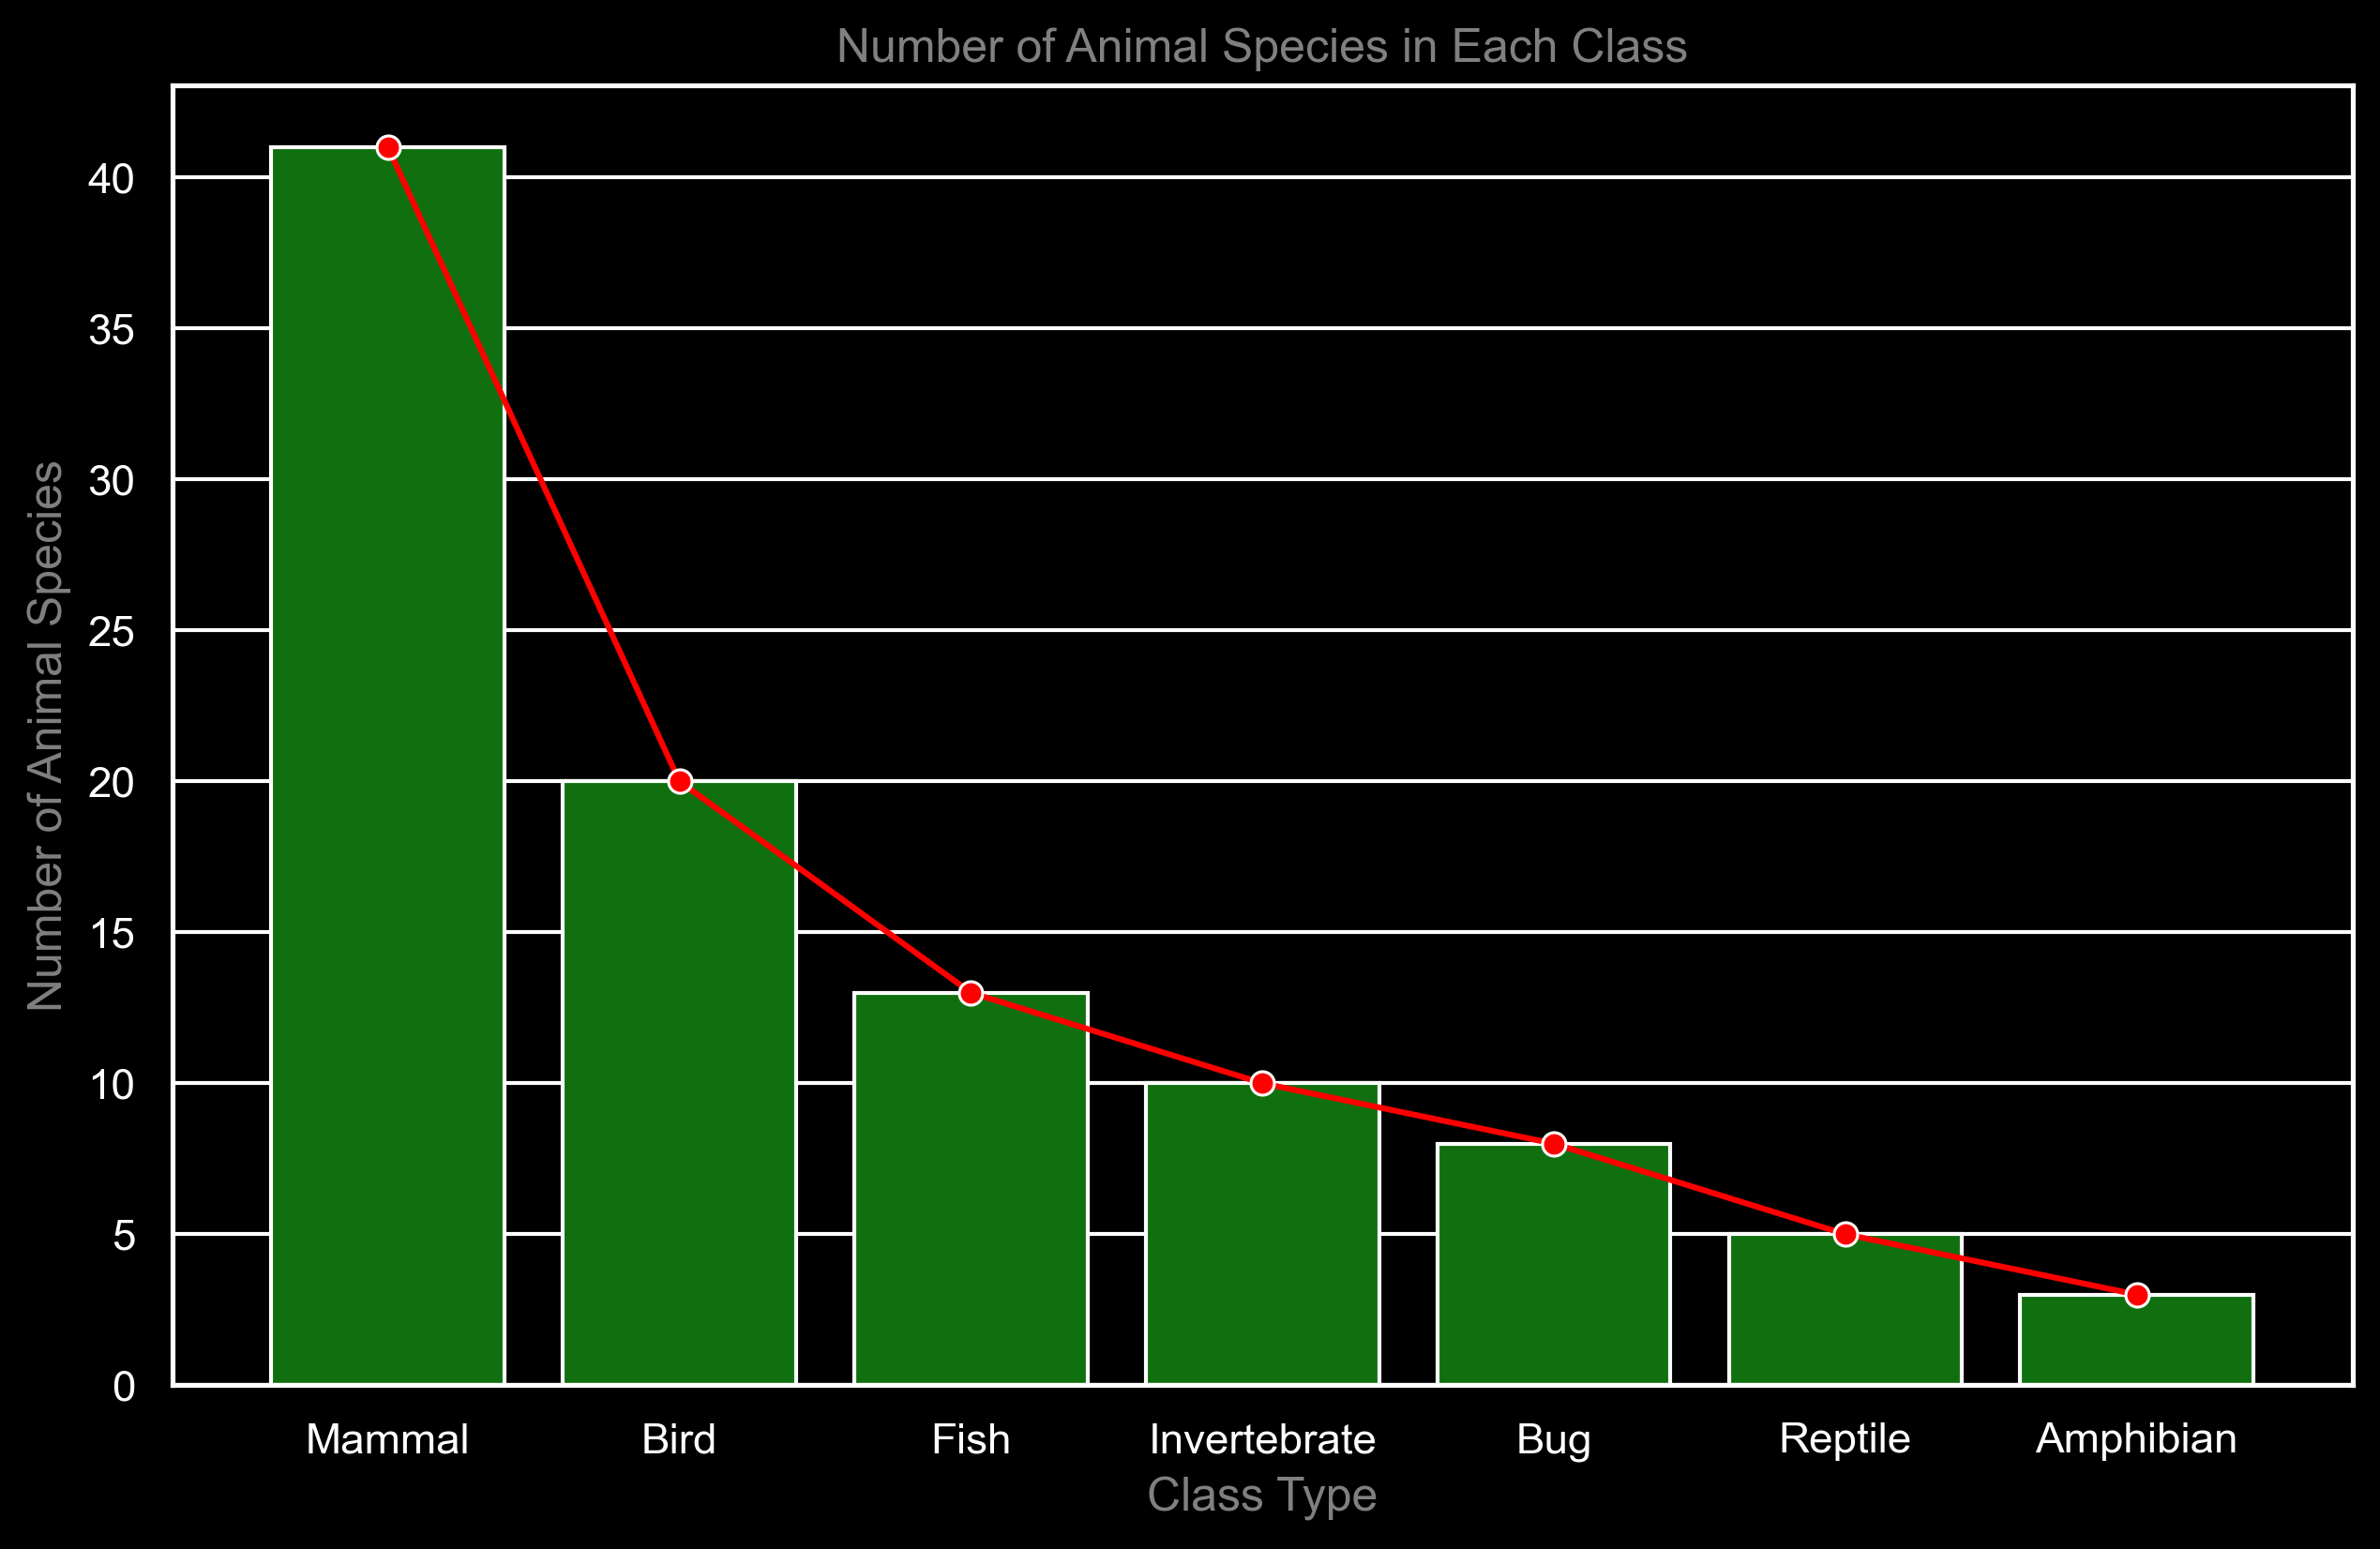

In [21]:
# Import necessary libraries and set plot style
plt.style.use('dark_background')

# Create a new figure with specified size
plt.figure(figsize=(10,6))

# Create a bar plot of animal species in each class
sns.barplot(x="Class_Type", y="Number_Of_Animal_Species_In_Class", data=class_data, color='green')

# Set plot title
plt.title('Number of Animal Species in Each Class', color='grey')

# Add a line plot to the existing bar plot for comparison
sns.lineplot(x="Class_Type", y="Number_Of_Animal_Species_In_Class", data=class_data, marker='o', linestyle='-', color='r')

# Set x-axis label
plt.xlabel("Class Type", color='grey')

# Set y-axis label
plt.ylabel("Number of Animal Species", color='grey')

# Display the plot
plt.show()

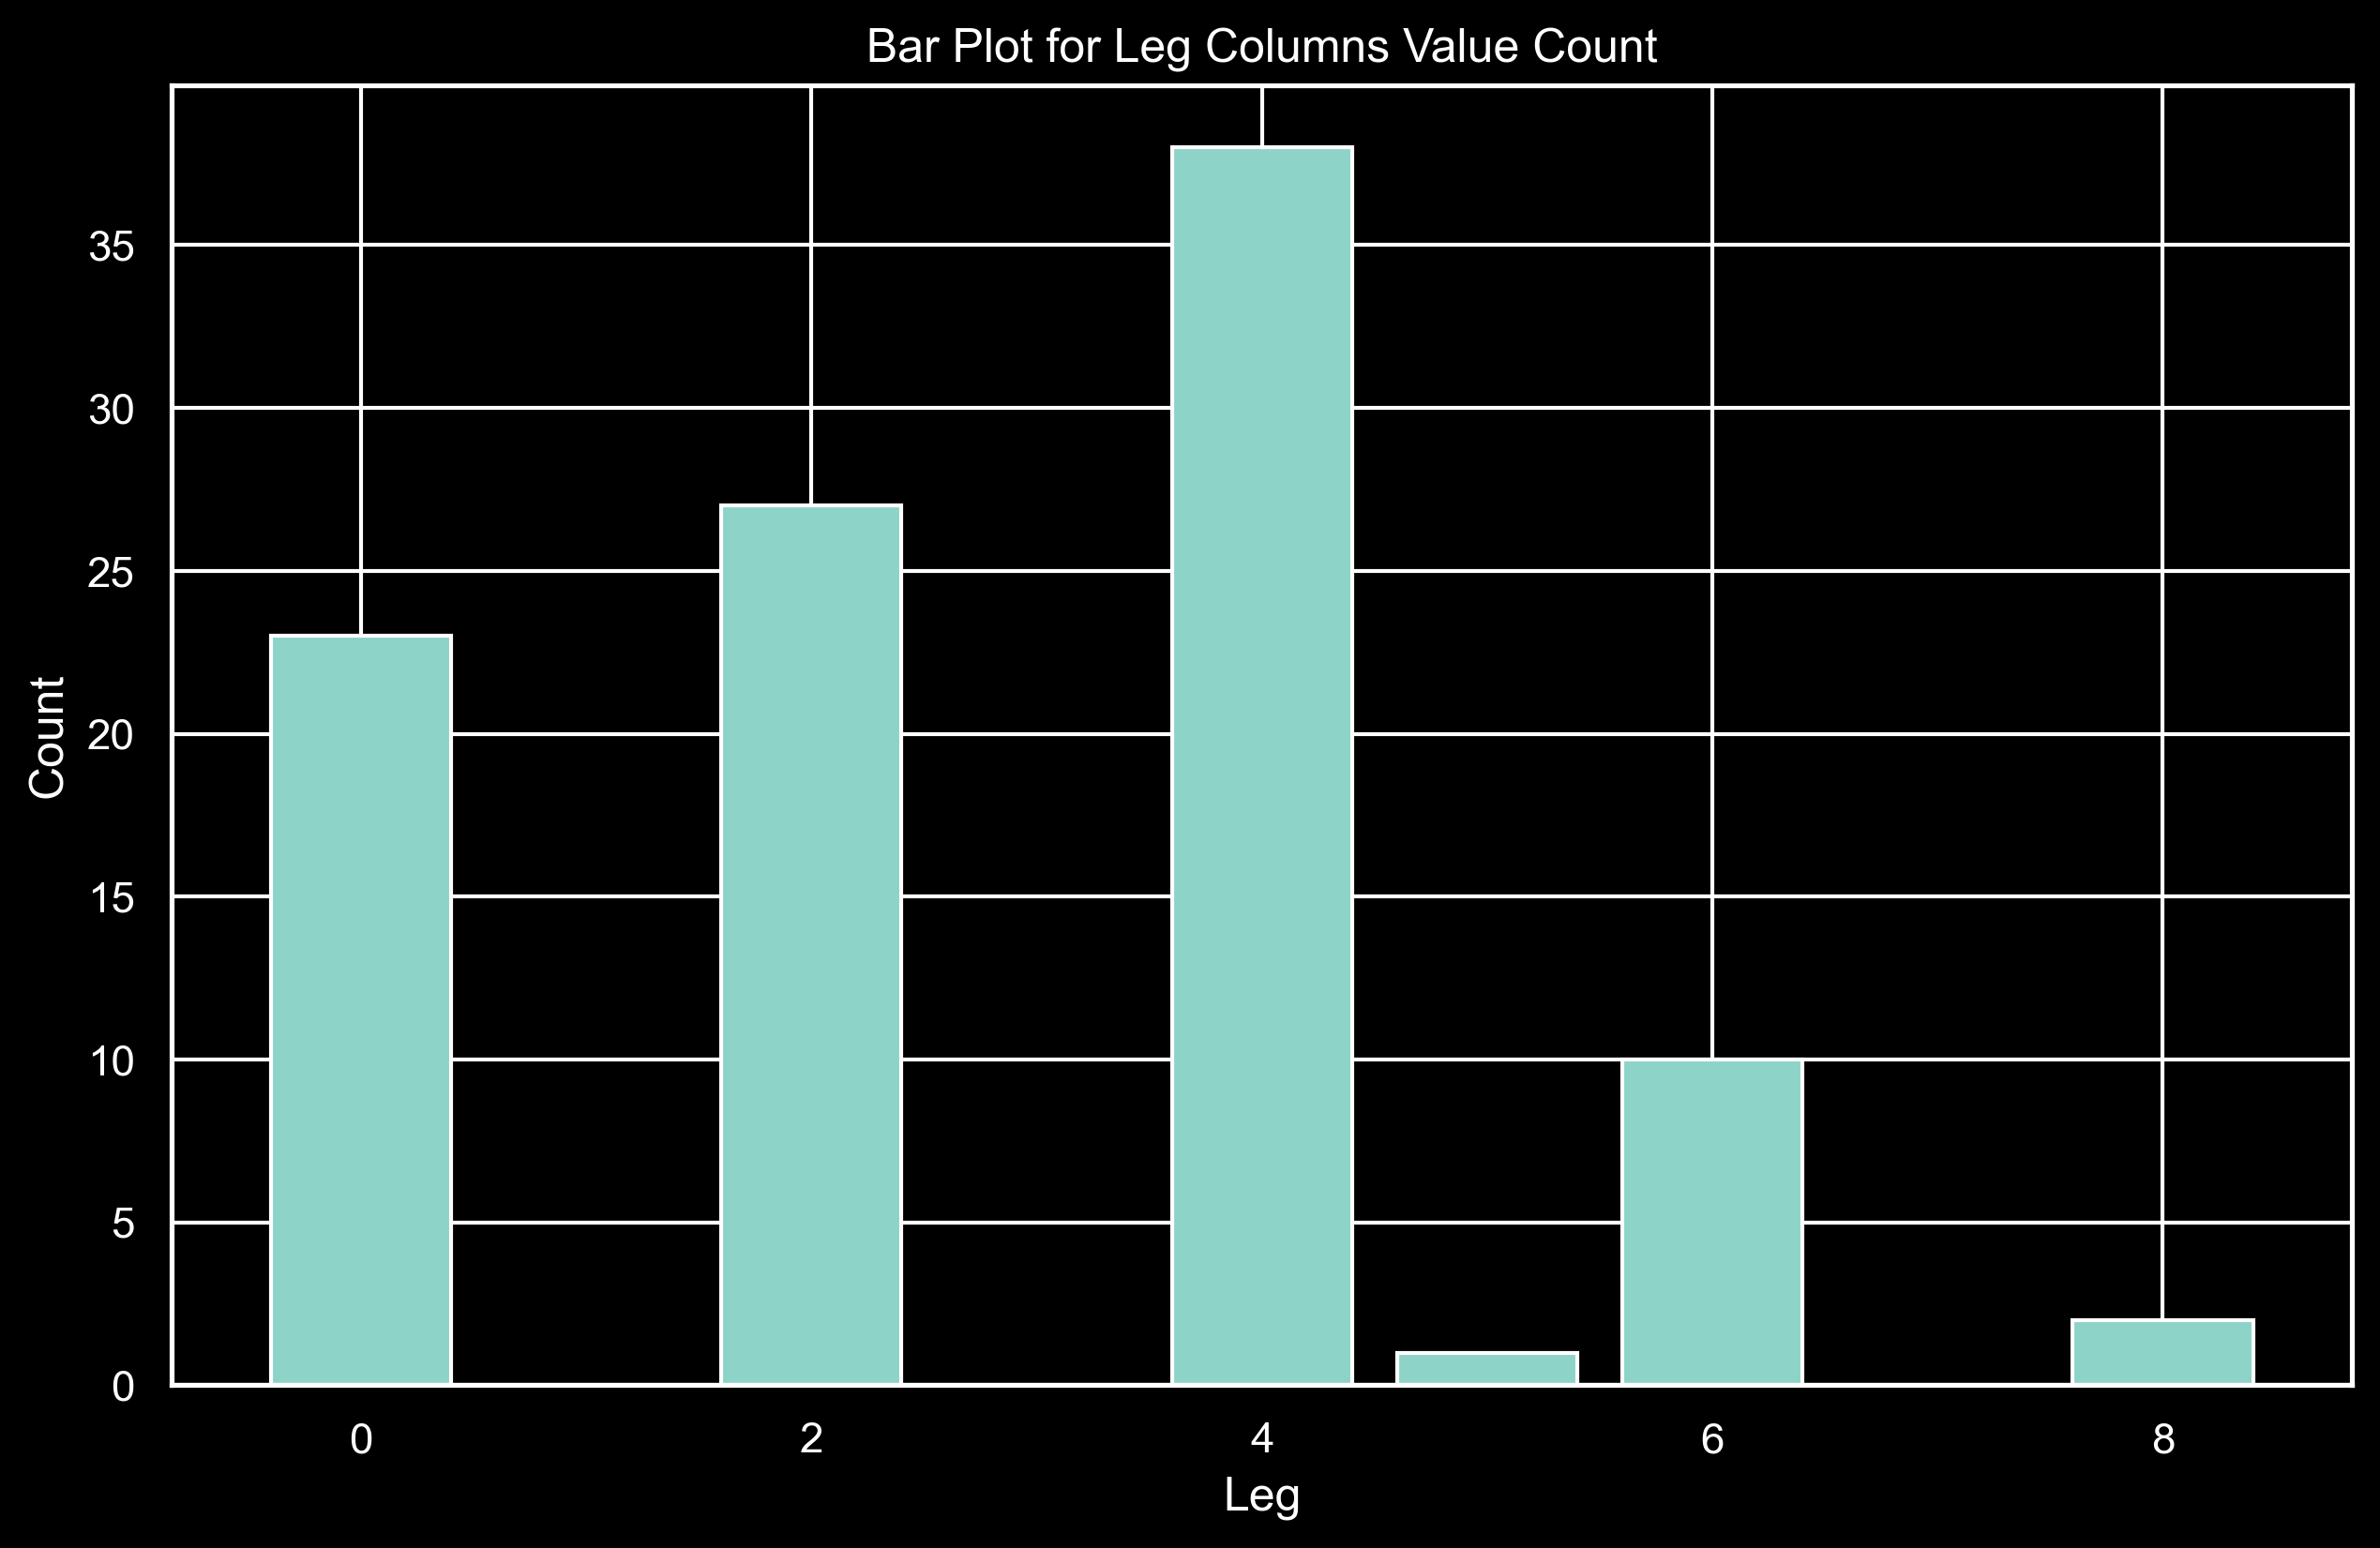

In [23]:
df
plt.figure(figsize=(10,6))
plt.bar(df['legs'].value_counts().index, df['legs'].value_counts().values)
plt.xlabel('Leg')
plt.ylabel('Count')
plt.title('Bar Plot for Leg Columns Value Count')
plt.show()

In [25]:
# Split the dataset into features (X) and target variable (y)
X = df.iloc[:,:-1]  # Features
y = df.iloc[:,-1:]  # Target variable

In [27]:
X.drop(columns="animal name", inplace=True)# Drop the 'animal name' column from the DataFrame X

In [29]:
# Create a StandardScaler object to scale the data
sc = StandardScaler()
# Scale the data using the StandardScaler and convert it back to a DataFrame
X = pd.DataFrame(sc.fit_transform(X), columns=X.columns)

In [31]:
X

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,1.138180
1,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,-1.115547,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180
2,-0.861034,-0.496904,0.843721,-0.826640,-0.558291,1.343710,0.896421,0.809776,0.46569,-1.951800,-0.293294,2.222876,-1.404435,0.588784,-0.384353,-0.878595
3,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,1.138180
4,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,-1.115547,0.809776,0.46569,0.512348,-0.293294,-0.449868,-0.415948,0.588784,-0.384353,1.138180
97,1.161395,-0.496904,0.843721,-0.826640,1.791182,-0.744208,-1.115547,-1.234909,-2.14735,0.512348,3.409545,-0.449868,1.561027,-1.698416,-0.384353,-0.878595
98,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180
99,-0.861034,-0.496904,0.843721,-0.826640,-0.558291,-0.744208,-1.115547,-1.234909,-2.14735,0.512348,-0.293294,-0.449868,-1.404435,-1.698416,-0.384353,-0.878595


In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.22,random_state=12)# Split the dataset into training and testing sets

In [35]:
# Model Building
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train,y_train)
ypred = knn.predict(X_test)
print(classification_report(y_test, ypred))
print("Training Accuracy:", knn.score(X_train, y_train))
print("Testing Accuracy:", knn.score(X_test, y_test))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       0.86      1.00      0.92         6
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           0.96        23
   macro avg       0.84      0.86      0.85        23
weighted avg       0.92      0.96      0.94        23

Training Accuracy: 0.9743589743589743
Testing Accuracy: 0.9565217391304348


In [37]:
#  Hyperparameter Tuning
train_acc = []
test_acc = []

for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    train_acc.append(knn.score(X_train,y_train))
    test_acc.append(knn.score(X_test,y_test))

In [39]:
train_acc

[1.0,
 0.9743589743589743,
 0.9871794871794872,
 0.9743589743589743,
 0.9871794871794872,
 0.9358974358974359,
 0.9358974358974359,
 0.9487179487179487,
 0.9230769230769231,
 0.9102564102564102,
 0.8974358974358975,
 0.8717948717948718,
 0.8589743589743589,
 0.8717948717948718,
 0.8717948717948718,
 0.8846153846153846,
 0.8846153846153846,
 0.8846153846153846,
 0.8846153846153846,
 0.8846153846153846]

In [41]:
test_acc

[0.9130434782608695,
 0.9130434782608695,
 0.9565217391304348,
 0.9565217391304348,
 0.9565217391304348,
 0.9565217391304348,
 0.9130434782608695,
 0.9130434782608695,
 0.9130434782608695,
 0.9130434782608695,
 0.9130434782608695,
 0.8695652173913043,
 0.8695652173913043,
 0.8695652173913043,
 0.9130434782608695,
 0.9130434782608695,
 0.9130434782608695,
 0.9130434782608695,
 0.9130434782608695,
 0.9130434782608695]

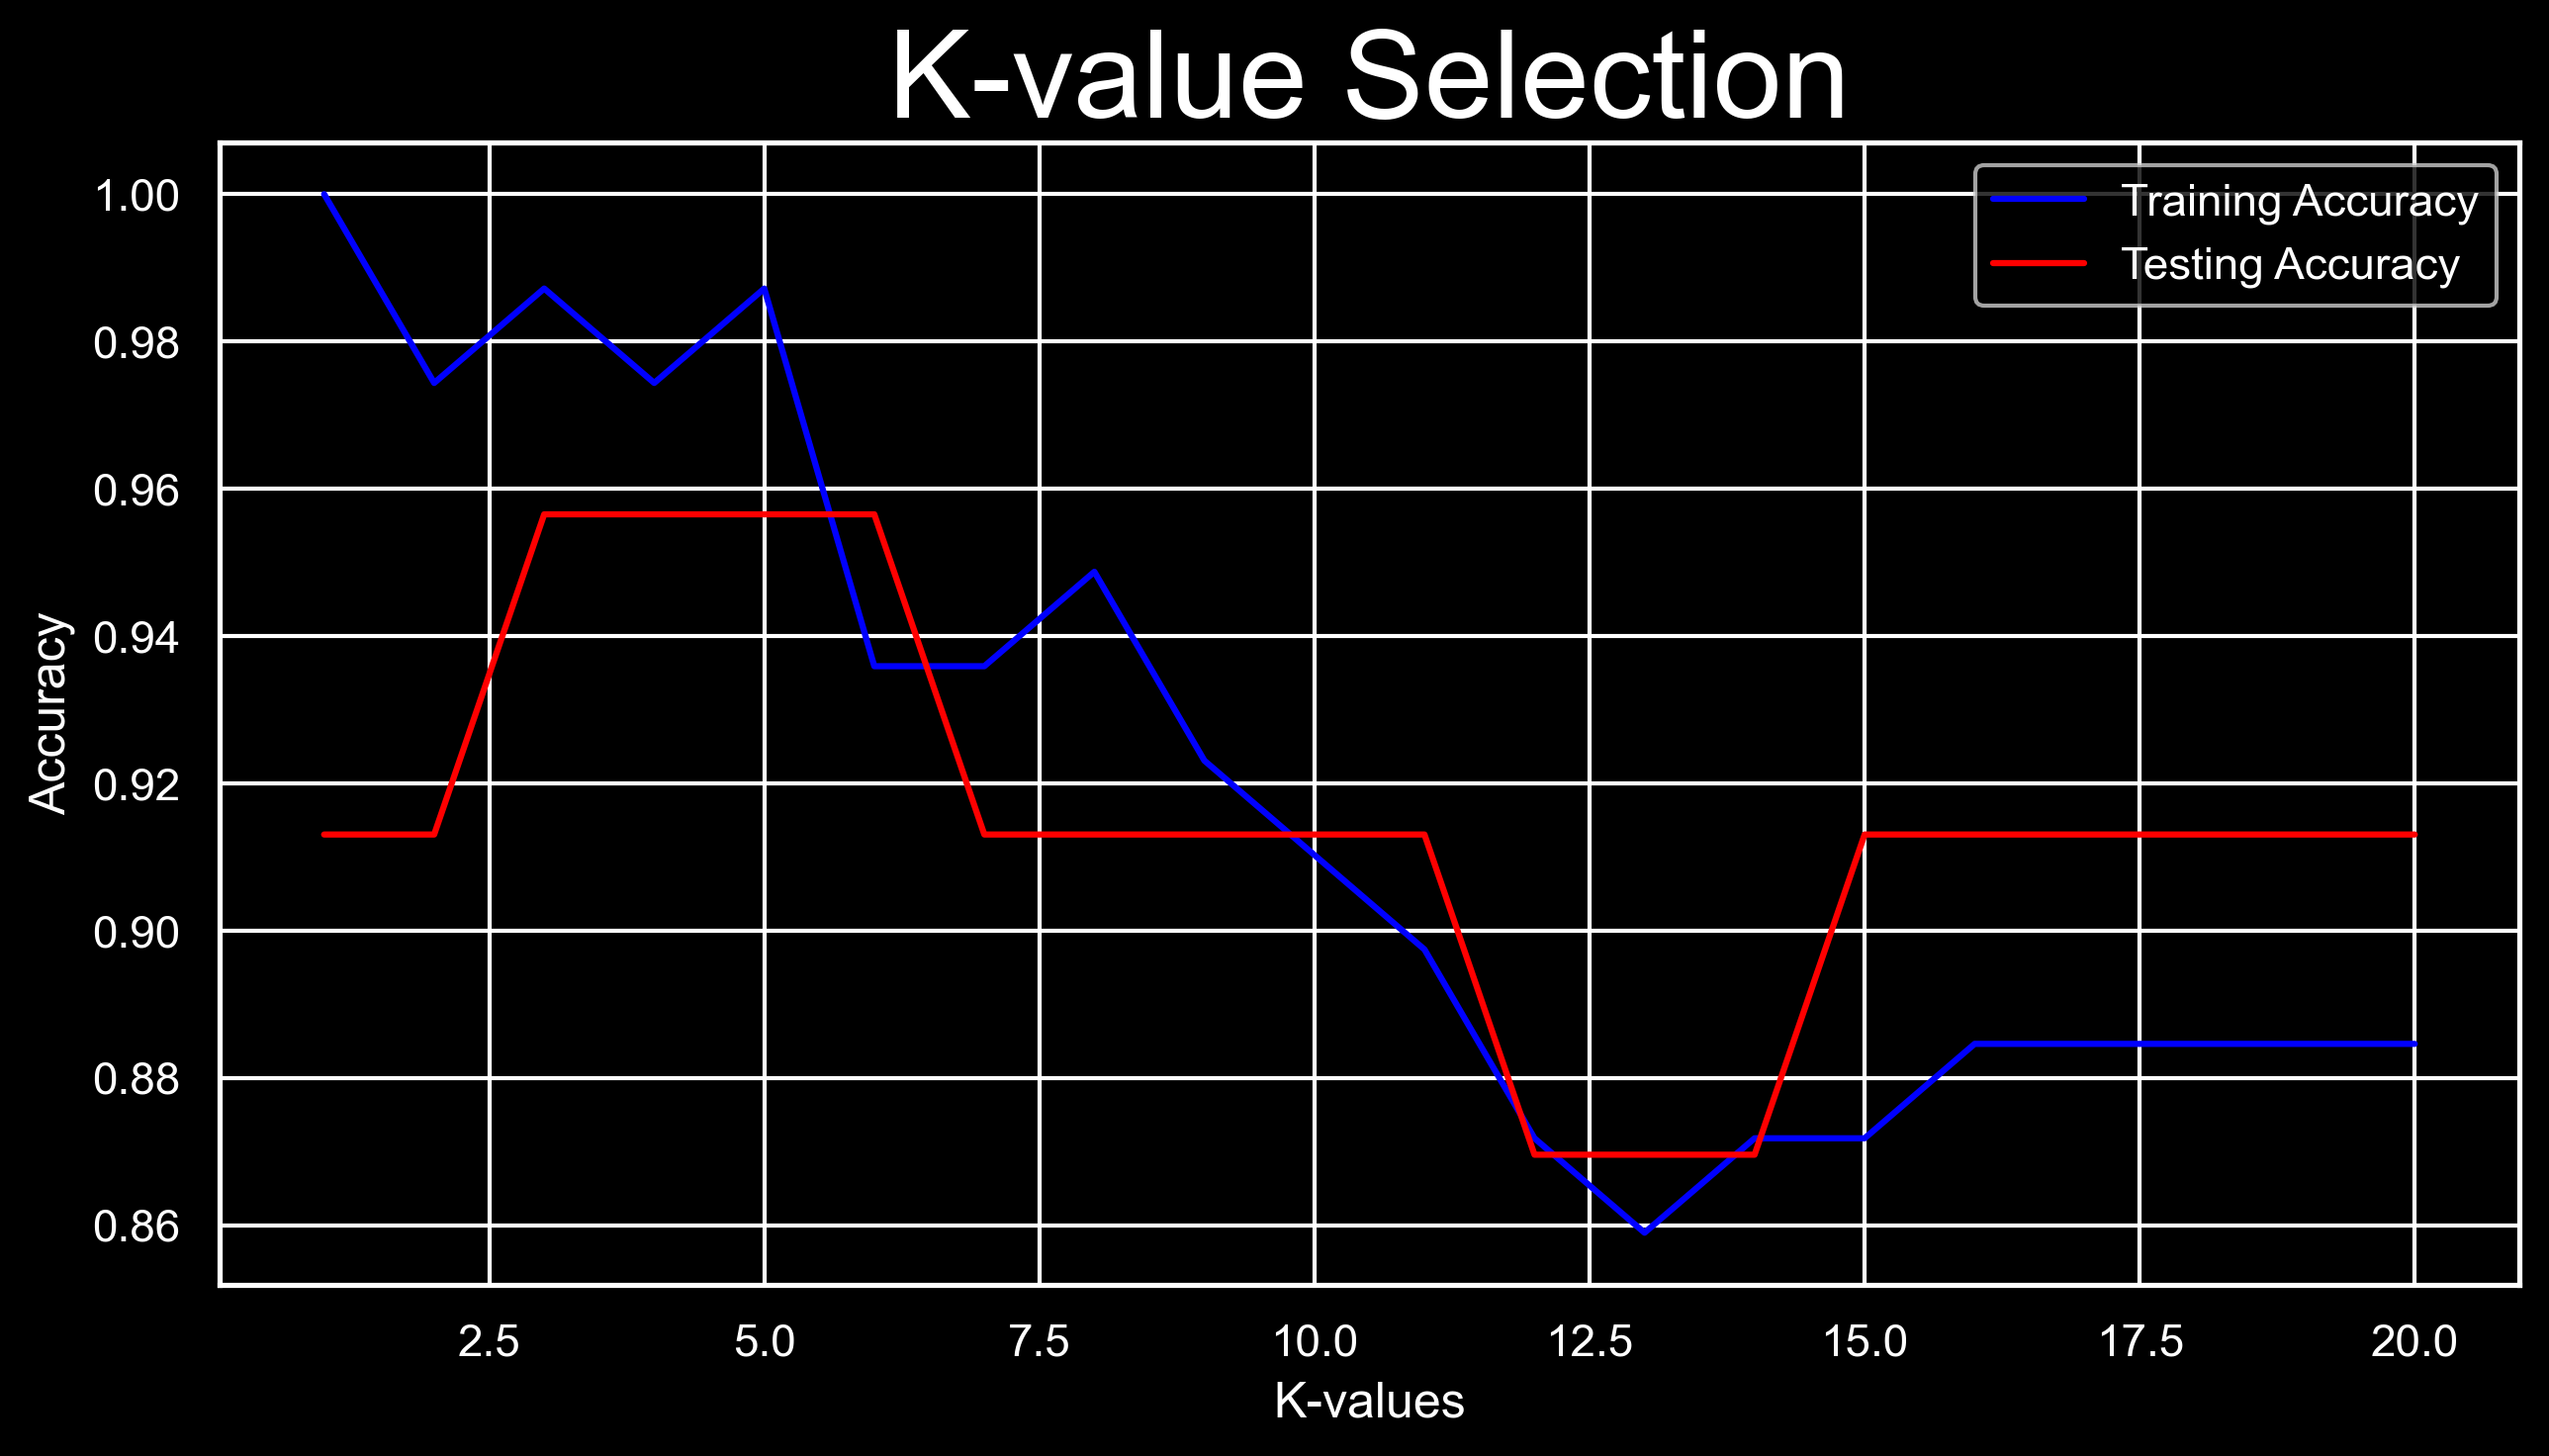

In [43]:
# Hyperparameter Selection method
plt.plot(range(1,21), train_acc, color = 'blue', label = 'Training Accuracy')
plt.plot(range(1,21), test_acc, color = 'red', label = 'Testing Accuracy')
plt.xlabel('K-values')
plt.ylabel('Accuracy')
plt.title('K-value Selection', size = 30)
plt.legend()

In [45]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
ypred = knn.predict(X_test)
print(classification_report(y_test, ypred))
print("train_acc" , knn.score(X_train,y_train))
print("test_acc" ,knn.score(X_test,y_test))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       0.86      1.00      0.92         6
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           0.96        23
   macro avg       0.84      0.86      0.85        23
weighted avg       0.92      0.96      0.94        23

train_acc 0.9871794871794872
test_acc 0.9565217391304348


In [47]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=knn, X=X_train, y=y_train, cv=10)
print(f"Cross-validation mean accuracy: {accuracies.mean()}")
print(f"Cross-validation std deviation: {accuracies.std()}")

Cross-validation mean accuracy: 0.8946428571428571
Cross-validation std deviation: 0.10020705604713


### Confusion Matrix

We will use a confusion matrix to visualize model performance, showing the correct and incorrect classifications for each class.

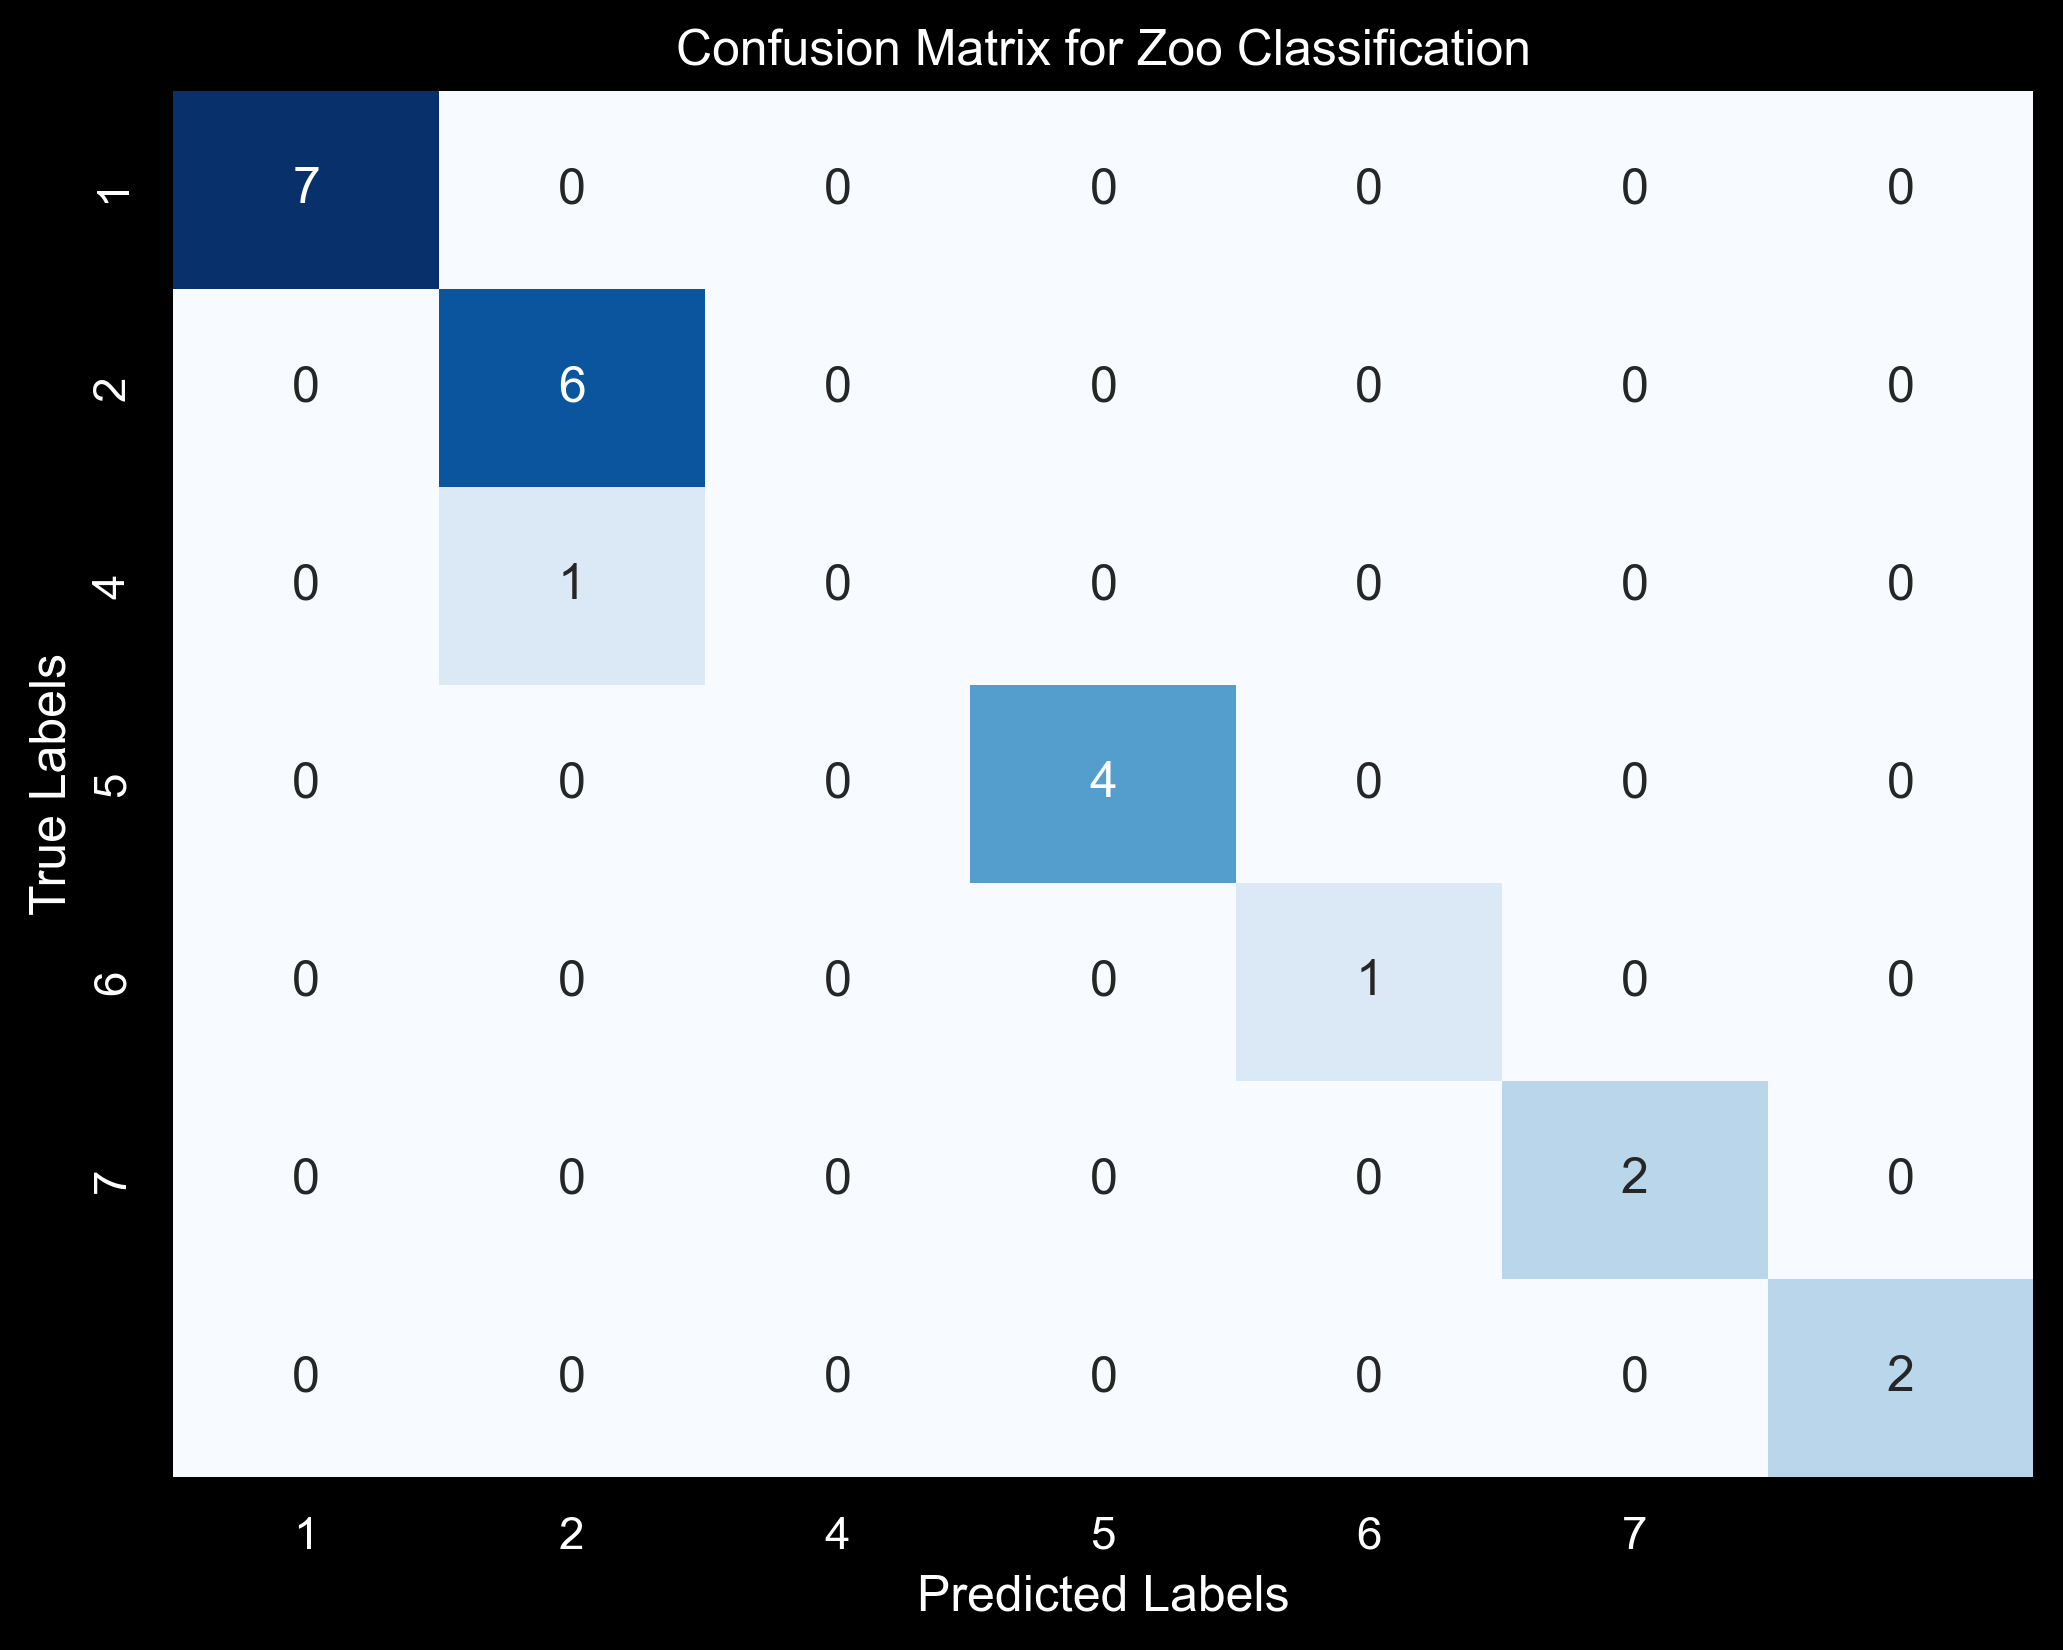

In [51]:
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, ypred)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=[1, 2, 4, 5, 6, 7], yticklabels=[1, 2, 4, 5, 6, 7])
plt.title('Confusion Matrix for Zoo Classification')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#### Interview Questions:

1)What are the key hyperparameters in KNN?
-
The number of nearest neighbors (k-)
The distance metric (e.g., Euclidean, Manhattan, Minkowsk-i)
The weight function (e.g., uniform, distance-based)

2)What distance metrics can be used in KNN?
-
Euclidean distanc-e
Manhattan distan-ce
Minkowski distance